In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
from functools import partial
# Basic parameters


In [ ]:
def flat_with_noise(n_year=5, dmin=-50, dmax=50):
    # function to produce a level change
    return([randint(dmin, dmax) for x in range(n_year)])

In [ ]:
def impulse(n_year=5, impyr=2, impsize=50,impsign=1):
    # function to produce an impulsive change 
    out = [0 for x in range(n_year)]
    out[impyr] = impsign*impsize 
    return(out)

In [ ]:
def cvx_change(n_years=5,alpha=0.75,chgsign=1):
    #function to produce convex change 
    # i.e. change where the time series of population falls below the line connecting any two 
    # points on the time series, i.e. alpha*exp(t) or alpha*exp(n_years - t)
    out = np.linspace(1,n_years,n_years)/n_years
    if chgsign > 0:
        output = alpha*np.exp(out)
        
    else:
        # handle the negative case 
        output = alpha*np.exp(n_years - out)
        
    output =  1.0 - (max(output)-output)/(max(output) - min(output))
    return(output)

In [ ]:
def ccv_change(n_years=5,alpha=0.75,chgsign=1):
    #function to produce convex change 
    # i.e. change where the time series of population falls below the line connecting any two 
    # points on the time series, i.e. alpha*exp(t) or alpha*exp(n_years - t)
    out = np.linspace(1,n_years,n_years)/n_years
    if chgsign < 0:
        output = alpha*np.exp(out)
        
    else:
        # handle the positive case 
        output = alpha*np.exp(n_years - out)
        
    output = (max(output)-output)/(max(output) - min(output))
    return(output)

In [24]:

sscRat = 100
tolerance = (-0.5, 0.25)
Alphas = np.linspace(.1,1,10)
pselect = [0.1 for x in Alphas]
growthPats = {'flat':flat_with_noise, 
              'impUp':impulse, 
              'impDn':partial(impulse, impsign=-1), 
              'cvxUp':cvx_change, 
              'cvxDn':partial(cvx_change, chgsign=-1),
              'ccvUp':ccv_change,
              'ccvDn':partial(ccv_change, chgsign=-1)
              }
NSchool = 11
len_history = 50

In [81]:
def simulate_history(total_years=50, period_length=5):
    history = []
    
    for tp in range(total_years//period_length):
        locidx = randint(0,len(growthPats)-1)
        locfun = list(growthPats.values())[locidx]()
        history.append(np.squeeze(locfun))

    return np.diff(np.hstack(history))

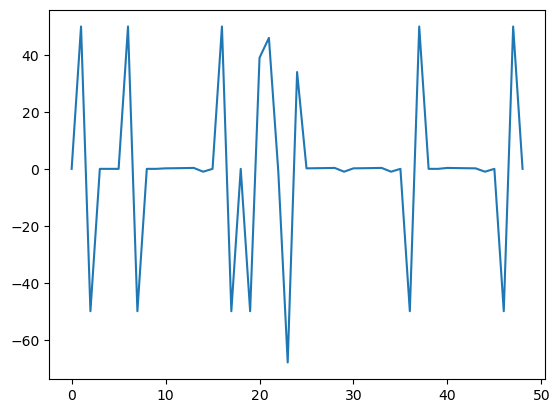

In [83]:
plt.plot(simulate_history())

In [31]:
55//6


9